In [72]:
from salishsea_tools import grid_tools, nc_tools, timeseries_tools, viz_tools
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import netCDF4 as nc
import xarray as xr
import datetime
from scipy import signal
import cmocean
import statsmodels.api as sm
%matplotlib inline

In [117]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [2]:
f0 = nc.Dataset('/data/vdo/MEOPAR/completed-runs/stats-runs/21sep14/SalishSea_1h_20140921_20140927_ptrc_T.nc')
f1 = nc.Dataset('/data/vdo/MEOPAR/completed-runs/stats-runs/15oct14/SalishSea_1h_20141015_20141025_ptrc_T.nc')
f2 = nc.Dataset('/data/vdo/MEOPAR/completed-runs/stats-runs/27nov14/SalishSea_1h_20141127_20141204_ptrc_T.nc')
f3 = nc.Dataset('/data/vdo/MEOPAR/completed-runs/stats-runs/03dec14/SalishSea_1h_20141203_20141211_ptrc_T.nc')
f4 = nc.Dataset('/data/vdo/MEOPAR/completed-runs/stats-runs/23dec14/SalishSea_1h_20141223_20141230_ptrc_T.nc')
f5 = nc.Dataset('/data/vdo/MEOPAR/completed-runs/stats-runs/16apr15/SalishSea_1h_20150416_20150423_ptrc_T.nc')
f6 = nc.Dataset('/data/vdo/MEOPAR/completed-runs/stats-runs/25apr15/SalishSea_1h_20150425_20150429_ptrc_T.nc')
f7 = nc.Dataset('/data/vdo/MEOPAR/completed-runs/stats-runs/30apr15/SalishSea_1h_20150430_20150503_ptrc_T.nc')
f8 = nc.Dataset('/data/vdo/MEOPAR/completed-runs/stats-runs/03jun15/SalishSea_1h_20150603_20150622_ptrc_T.nc')
f9 = nc.Dataset('/data/vdo/MEOPAR/completed-runs/stats-runs/29jun15/SalishSea_1h_20150629_20150706_ptrc_T.nc')
f10 = nc.Dataset('/data/vdo/MEOPAR/completed-runs/stats-runs/13jul15/SalishSea_1h_20150713_20150722_ptrc_T.nc')
f11 = nc.Dataset('/data/vdo/MEOPAR/completed-runs/stats-runs/09aug15/SalishSea_1h_20150809_20150824_ptrc_T.nc')
f12 = nc.Dataset('/data/vdo/MEOPAR/completed-runs/stats-runs/27aug15/SalishSea_1h_20150827_20150903_ptrc_T.nc')
f13 = nc.Dataset('/data/vdo/MEOPAR/completed-runs/stats-runs/10sep15/SalishSea_1h_20150910_20151013_ptrc_T.nc')
f14 = nc.Dataset('/data/vdo/MEOPAR/completed-runs/stats-runs/13nov15/SalishSea_1h_20151113_20151125_ptrc_T.nc')
f15 = nc.Dataset('/data/vdo/MEOPAR/completed-runs/stats-runs/13dec15/SalishSea_1h_20151212_20151215_ptrc_T.nc')
f16 = nc.Dataset('/data/vdo/MEOPAR/completed-runs/stats-runs/23dec15/SalishSea_1h_20151223_20151226_ptrc_T.nc')
f17 = nc.Dataset('/data/vdo/MEOPAR/completed-runs/stats-runs/10jan16/SalishSea_1h_20160110_20160206_ptrc_T.nc')
f18 = nc.Dataset('/data/vdo/MEOPAR/completed-runs/stats-runs/26mar16/SalishSea_1h_20160326_20160329_ptrc_T.nc')
f19 = nc.Dataset('/data/vdo/MEOPAR/completed-runs/stats-runs/03may16/SalishSea_1h_20160503_20160514_ptrc_T.nc')
f20 = nc.Dataset('/data/vdo/MEOPAR/completed-runs/stats-runs/17may16/SalishSea_1h_20160517_20160520_ptrc_T.nc')
f21 = nc.Dataset('/data/vdo/MEOPAR/completed-runs/stats-runs/24jul16/SalishSea_1h_20160724_20160802_ptrc_T.nc')
f22 = nc.Dataset('/data/vdo/MEOPAR/completed-runs/stats-runs/02aug16/SalishSea_1h_20160802_20160828_ptrc_T.nc')
f23 = nc.Dataset('/data/vdo/MEOPAR/completed-runs/stats-runs/29dec16/SalishSea_1h_20161229_20170102_ptrc_T.nc')
f24 = nc.Dataset('/data/vdo/MEOPAR/completed-runs/stats-runs/03apr17/SalishSea_1h_20170403_20170407_ptrc_T.nc')
f25 = nc.Dataset('/data/vdo/MEOPAR/completed-runs/stats-runs/10jun17/SalishSea_1h_20170610_20170616_ptrc_T.nc')
f26 = nc.Dataset('/data/vdo/MEOPAR/completed-runs/stats-runs/19jun17/SalishSea_1h_20170619_20170629_ptrc_T.nc')
f27 = nc.Dataset('/data/vdo/MEOPAR/completed-runs/stats-runs/08jul17/SalishSea_1h_20170708_20170711_ptrc_T.nc')
f28 = nc.Dataset('/data/vdo/MEOPAR/completed-runs/stats-runs/23jul17/SalishSea_1h_20170723_20170728_ptrc_T.nc')
f29 = nc.Dataset('/data/vdo/MEOPAR/completed-runs/stats-runs/12sep17/SalishSea_1h_20170912_20170916_ptrc_T.nc')
f30 = nc.Dataset('/data/vdo/MEOPAR/completed-runs/stats-runs/17dec17/SalishSea_1h_20171217_20171221_ptrc_T.nc')

In [3]:
f0surface = f0.variables['mytracer3'][:,0,350:750,100:]

In [4]:
f1surface = f1.variables['mytracer3'][:,0,350:750,100:]

In [5]:
f2surface = f2.variables['mytracer3'][:,0,350:750,100:]
f3surface = f3.variables['mytracer3'][:,0,350:750,100:]

In [6]:
f4surface = f4.variables['mytracer3'][:,0,350:750,100:]
f5surface = f5.variables['mytracer3'][:,0,350:750,100:]

In [7]:
f6surface = f6.variables['mytracer3'][:,0,350:750,100:]

In [8]:
f7surface = f7.variables['mytracer3'][:,0,350:750,100:]

In [9]:
f8surface = f8.variables['mytracer3'][:,0,350:750,100:]

In [10]:
f9surface = f9.variables['mytracer3'][:,0,350:750,100:]
f10surface = f10.variables['mytracer3'][:,0,350:750,100:]

In [11]:
f11surface = f11.variables['mytracer3'][:,0,350:750,100:]

In [12]:
f12surface = f12.variables['mytracer3'][:,0,350:750,100:]

In [13]:
f13surface = f13.variables['mytracer3'][:,0,350:750,100:]
f14surface = f14.variables['mytracer3'][:,0,350:750,100:]

In [14]:
f15surface = f15.variables['mytracer3'][:,0,350:750,100:]

In [15]:
f16surface = f16.variables['mytracer3'][:,0,350:750,100:]

In [16]:
f17surface = f17.variables['mytracer3'][:,0,350:750,100:]

In [17]:
f18surface = f18.variables['mytracer3'][:,0,350:750,100:]
f19surface = f19.variables['mytracer3'][:,0,350:750,100:]

In [18]:
f20surface = f20.variables['mytracer3'][:,0,350:750,100:]
f21surface = f21.variables['mytracer3'][:,0,350:750,100:]

In [19]:
f22surface = f22.variables['mytracer3'][:,0,350:750,100:]

In [20]:
f23surface = f23.variables['mytracer3'][:,0,350:750,100:]
f24surface = f24.variables['mytracer3'][:,0,350:750,100:]
f25surface = f25.variables['mytracer3'][:,0,350:750,100:]

In [21]:
f26surface = f26.variables['mytracer3'][:,0,350:750,100:]
f27surface = f27.variables['mytracer3'][:,0,350:750,100:]
f28surface = f28.variables['mytracer3'][:,0,350:750,100:]

In [22]:
f29surface = f29.variables['mytracer3'][:,0,350:750,100:]
f30surface = f30.variables['mytracer3'][:,0,350:750,100:]

In [23]:
mesh = nc.Dataset('/data/vdo/MEOPAR/NEMO-forcing/grid/mesh_mask201702.nc')

In [24]:
f9surface.shape

(192, 400, 298)

In [25]:
together = np.append(f0surface, f1surface, axis = 0)
for f in ([f2surface,f3surface,f4surface,f5surface,f6surface,f7surface,f8surface,f9surface, 
           f10surface, f11surface, f12surface, f13surface, f14surface, f15surface, f16surface,
           f17surface, f18surface, f19surface, f20surface, f21surface, f22surface, f23surface,
           f24surface, f25surface, f26surface, f27surface, f28surface, f29surface, f30surface]):
    together = np.append(together, f, axis = 0)
f.shape

(120, 400, 298)

In [26]:
together.shape

(7440, 400, 298)

In [27]:
together[together > 2] = 0
together.shape

(7440, 400, 298)

In [28]:
cropped_mesh = 1 - mesh.variables['tmask'][0,0,350:750, 100:]

In [42]:
from scipy import signal

In [43]:
import xarray as xr
import datetime

In [44]:
winds = xr.open_dataset('https://salishsea.eos.ubc.ca/erddap/griddap/ubcSSaSurfaceAtmosphereFieldsV1')

In [45]:
si_uwinds = np.array([])
si_vwinds = np.array([])
ss_uwinds = np.array([])
ss_vwinds = np.array([])
dates = np.array([])
for f in ([f0, f1, f2, f3,f4, f5, f6,f7, f8, f9, f10, f11, f12, f13, f14, f15, f16, f17, f18, f19, 
           f20, f21, f22, f23, f24, f25, f26, f27, f28, f29, f30]):
    dates = np.append(dates, nc.num2date(f.variables['time_counter'][:],
                                        f.variables['time_counter'].units))
    si_uwind = (winds.u_wind.isel(gridY = 160, gridX = 120)
                .sel(time = slice(nc.num2date(f.variables['time_counter'][0],
                                              f.variables['time_counter'].units),
                                  nc.num2date(f.variables['time_counter'][-1],
                                              f.variables['time_counter'].units) 
                                  + datetime.timedelta(hours = 1)))).values
    si_vwind = (winds.v_wind.isel(gridY = 160, gridX = 120)
                .sel(time = slice(nc.num2date(f.variables['time_counter'][0],
                                              f.variables['time_counter'].units),
                                  nc.num2date(f.variables['time_counter'][-1],
                                              f.variables['time_counter'].units) 
                                  + datetime.timedelta(hours = 1)))).values
    ss_uwind = (winds.u_wind.isel(gridY = 183, gridX = 107)
                .sel(time = slice(nc.num2date(f.variables['time_counter'][0],
                                              f.variables['time_counter'].units),
                                  nc.num2date(f.variables['time_counter'][-1],
                                              f.variables['time_counter'].units) 
                                  + datetime.timedelta(hours = 1)))).values
    ss_vwind = (winds.v_wind.isel(gridY = 183, gridX = 107)
                .sel(time = slice(nc.num2date(f.variables['time_counter'][0],
                                              f.variables['time_counter'].units),
                                  nc.num2date(f.variables['time_counter'][-1],
                                              f.variables['time_counter'].units) 
                                  + datetime.timedelta(hours = 1)))).values
    si_uwinds = np.append(si_uwinds, si_uwind)
    si_vwinds = np.append(si_vwinds, si_vwind)
    ss_uwinds = np.append(ss_uwinds, ss_uwind)
    ss_vwinds = np.append(ss_vwinds, ss_vwind)

In [46]:
from salishsea_tools import timeseries_tools, geo_tools, tidetools
grid = nc.Dataset('/data/vdo/MEOPAR/NEMO-forcing/grid/bathymetry_201702.nc')
bathy, X, Y = tidetools.get_bathy_data(grid)
lats = grid.variables['nav_lat'][350:750:5,100::5]
lons = grid.variables['nav_lon'][350:750:5,100::5]

compressed_lats0 = np.ma.masked_array(lats, 
                                     mask = 1 - 
                                      mesh.variables['tmask'][0,0,350:750:5,100::5]).compressed()
compressed_lons0 = np.ma.masked_array(lons, 
                                     mask = 1 
                                      - mesh.variables['tmask'][0,0,350:750:5,100::5]).compressed()
Yinds = np.array([])
Xinds = np.array([])
for lon, lat in zip(compressed_lons0, compressed_lats0):
    Yind, Xind = geo_tools.find_closest_model_point(lon, lat, X[350:750:5,100::5],
                                                    Y[350:750:5,100::5], 
                                                    land_mask = bathy.mask[350:750:5,100::5])
    Yinds = np.append(Yinds, Yind)
    Xinds = np.append(Xinds, Xind)

In [59]:
s = 100000
nyqst = 1 / 500 / 2
lowcut = 1 / s
together2 = np.zeros(together.shape)
for t in range(7440):
    for i, row in enumerate(together[t,...]):  
        for slc in np.ma.clump_unmasked(np.ma.masked_array(row, mask = cropped_mesh[i, :])):
            together2[t, i, slc] = signal.lfilter(*signal.butter(2, lowcut / nyqst, btype='highpass'), row[slc])

In [60]:
Z2 = np.ma.reshape(np.ma.masked_array(together2[:,::5,::5], 
                                      mask = (1-mesh.variables['tmask'][:,0,350:750:5,100::5])
                                      *np.ones((7440,1,1))).compressed(), 
                   ((7440, -1)))

In [61]:
A_prime2, sqrtL2, E_T2 = np.linalg.svd(Z2, full_matrices=False)
A2 = A_prime2.dot(np.diag(sqrtL2))
PercentVar2 = sqrtL2**2/(sqrtL2**2).sum()
Z_02 = A2[:, 0, np.newaxis].dot(E_T2[0, np.newaxis, :])

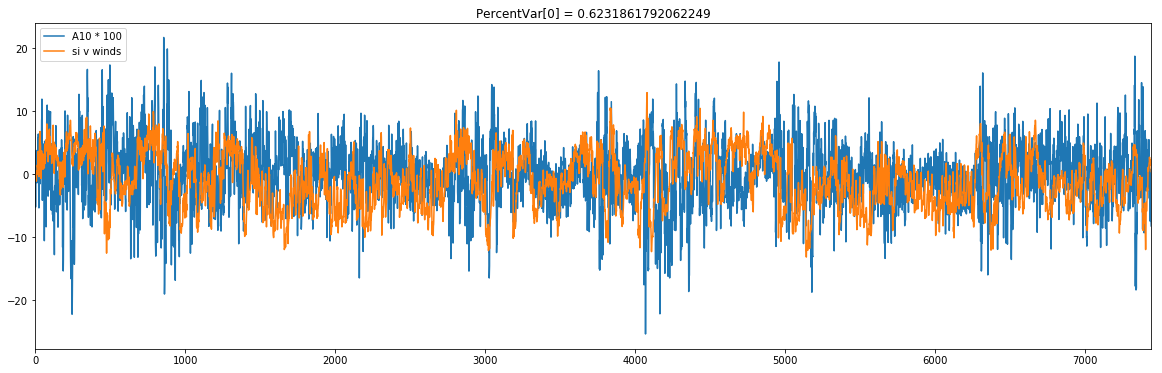

In [73]:
fig, ax = plt.subplots(figsize = (20,6))
ax.plot(A2[:,100]*-100, label = 'A10 * 100')
ax.plot(si_vwinds, label = 'si v winds')
ax.legend()
ax.set_title('PercentVar[0] = ' + str(PercentVar2[0]))
ax.set_xlim(0,7440);

In [74]:
X = sm.add_constant(A2[:,100])
model = sm.OLS(si_vwinds, X)
results = model.fit()
print('100 km R2: ', results.rsquared)

100 km R2:  0.002906876646201262


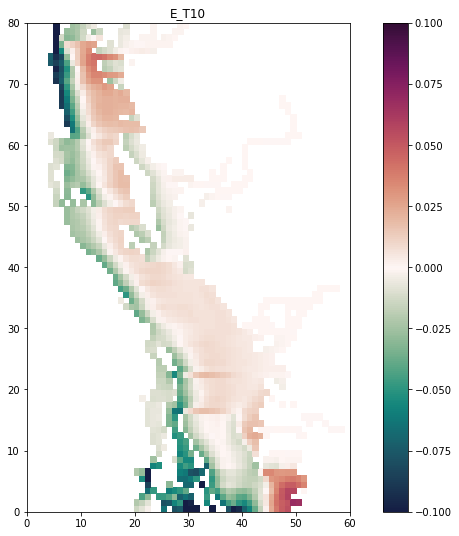

In [63]:
gridded = np.zeros((80,60))
for Yind, Xind, data in zip(Yinds, Xinds, E_T2[0,:]):
    gridded[int(Yind), int(Xind)] = data
fig, ax = plt.subplots(figsize = ((12,9)))
z = ax.pcolormesh(np.ma.masked_array(gridded, 
                                     mask = 1 - 
                                     mesh.variables['tmask'][0,0,350:750:5, 100::5]),
                  vmin = -0.1, vmax = 0.1, 
                  cmap = cmocean.cm.curl)
fig.colorbar(z, ax=ax)
ax.set_title('E_T10')
viz_tools.set_aspect(ax);

In [64]:
s = 200000
nyqst = 1 / 500 / 2
lowcut = 1 / s
together3 = np.zeros(together.shape)
for t in range(7440):
    for i, row in enumerate(together[t,...]):  
        for slc in np.ma.clump_unmasked(np.ma.masked_array(row, mask = cropped_mesh[i, :])):
            together3[t, i, slc] = signal.lfilter(*signal.butter(2, lowcut / nyqst, btype='highpass'), row[slc])

In [65]:
Z3 = np.ma.reshape(np.ma.masked_array(together3[:,::5,::5], 
                                      mask = (1-mesh.variables['tmask'][:,0,350:750:5,100::5])
                                      *np.ones((7440,1,1))).compressed(), 
                   ((7440, -1)))
A_prime3, sqrtL3, E_T3 = np.linalg.svd(Z3, full_matrices=False)
A3 = A_prime3.dot(np.diag(sqrtL3))
PercentVar3 = sqrtL3**2/(sqrtL3**2).sum()
Z_03 = A3[:, 0, np.newaxis].dot(E_T3[0, np.newaxis, :])

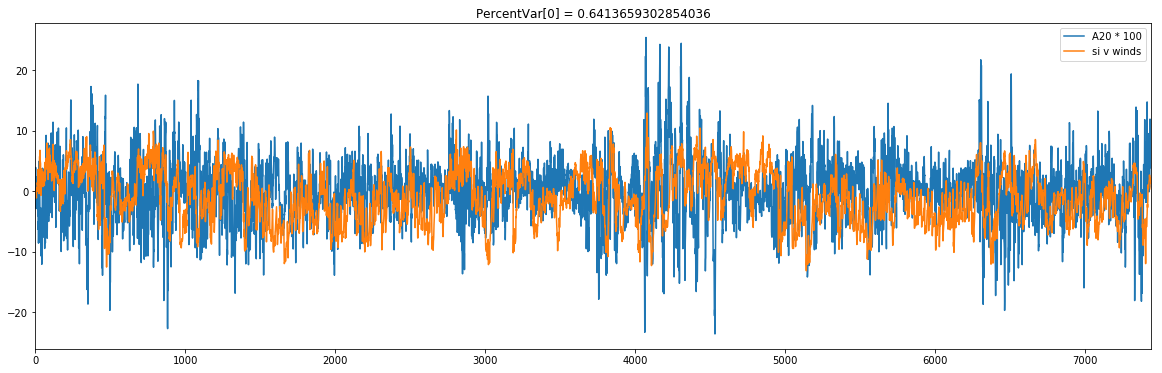

In [75]:
fig, ax = plt.subplots(figsize = (20,6))
ax.plot(A3[:,100]*100, label = 'A20 * 100')
ax.plot(si_vwinds, label = 'si v winds')
ax.legend()
ax.set_title('PercentVar[0] = ' + str(PercentVar3[0]))
ax.set_xlim(0,7440);

In [76]:
X = sm.add_constant(A3[:,100])
model = sm.OLS(si_vwinds, X)
results = model.fit()
print('200 km R2: ', results.rsquared)

200 km R2:  0.00063403721471611


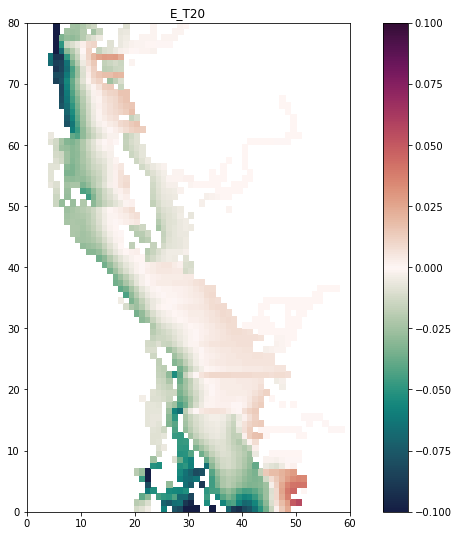

In [67]:
gridded = np.zeros((80,60))
for Yind, Xind, data in zip(Yinds, Xinds, E_T3[0,:]):
    gridded[int(Yind), int(Xind)] = data
fig, ax = plt.subplots(figsize = ((12,9)))
z = ax.pcolormesh(np.ma.masked_array(gridded, 
                                     mask = 1 - 
                                     mesh.variables['tmask'][0,0,350:750:5, 100::5]),
                  vmin = -0.1, vmax = 0.1, 
                  cmap = cmocean.cm.curl)
fig.colorbar(z, ax=ax)
ax.set_title('E_T20')
viz_tools.set_aspect(ax);

In [68]:
s = 150000
nyqst = 1 / 500 / 2
lowcut = 1 / s
together4 = np.zeros(together.shape)
for t in range(7440):
    for i, row in enumerate(together[t,...]):  
        for slc in np.ma.clump_unmasked(np.ma.masked_array(row, mask = cropped_mesh[i, :])):
            together4[t, i, slc] = signal.lfilter(*signal.butter(2, lowcut / nyqst, btype='highpass'), row[slc])
Z4 = np.ma.reshape(np.ma.masked_array(together4[:,::5,::5], 
                                      mask = (1-mesh.variables['tmask'][:,0,350:750:5,100::5])
                                      *np.ones((7440,1,1))).compressed(), 
                   ((7440, -1)))
A_prime4, sqrtL4, E_T4 = np.linalg.svd(Z4, full_matrices=False)
A4 = A_prime4.dot(np.diag(sqrtL4))
PercentVar4 = sqrtL4**2/(sqrtL4**2).sum()
Z_04 = A4[:, 0, np.newaxis].dot(E_T4[0, np.newaxis, :])

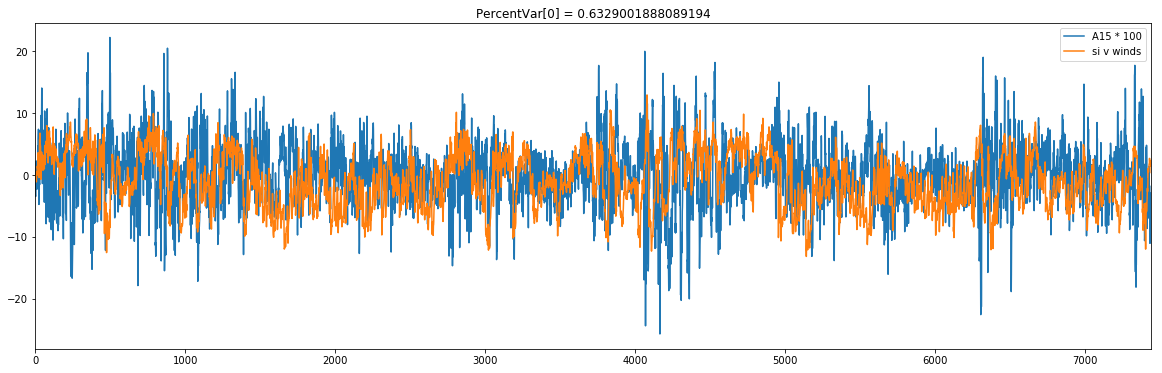

In [77]:
fig, ax = plt.subplots(figsize = (20,6))
ax.plot(A4[:,100]*100, label = 'A15 * 100')
ax.plot(si_vwinds, label = 'si v winds')
ax.legend()
ax.set_title('PercentVar[0] = ' + str(PercentVar4[0]))
ax.set_xlim(0,7440);

In [78]:
X = sm.add_constant(A4[:,100])
model = sm.OLS(si_vwinds, X)
results = model.fit()
print('150 km R2: ', results.rsquared)

150 km R2:  0.0024495967502414784


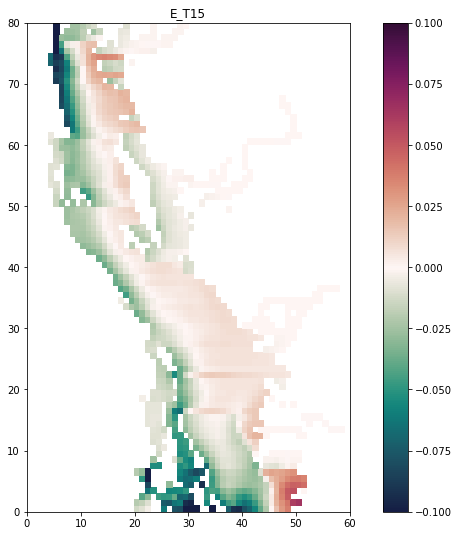

In [70]:
gridded = np.zeros((80,60))
for Yind, Xind, data in zip(Yinds, Xinds, E_T4[0,:]):
    gridded[int(Yind), int(Xind)] = data
fig, ax = plt.subplots(figsize = ((12,9)))
z = ax.pcolormesh(np.ma.masked_array(gridded, 
                                     mask = 1 - 
                                     mesh.variables['tmask'][0,0,350:750:5, 100::5]),
                  vmin = -0.1, vmax = 0.1, 
                  cmap = cmocean.cm.curl)
fig.colorbar(z, ax=ax)
ax.set_title('E_T15')
viz_tools.set_aspect(ax);